## Question 2: Finding Groupings in Human's Mitochondrial SNP/Mutations Patterns

# Loading the dataset

In [1]:
Mt <- read.csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Mt1t.mutate.csv",header=TRUE,sep=',')
Mt <- Mt[-c(1:3),]
#Mt
dim(Mt) #[1] 1074 2712


[1] 1074 2712

# Solution

In [2]:
data = Mt
data$Group <- as.factor(data$Group)
print (data)

     Group X1 X2 X3 X4 X5 X6 X7 X8 X9 X10 X11 X12 X13 X14 X15 X16 X17 X18 X19
4        H  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
5        T  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
6        H  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
7        X  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
8        J  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
9        H  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
10       J  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
11       U  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
12       J  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
13       X  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
14       U  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
15       H  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   

# Handling missing data

In [3]:
sum(is.na(data))

[1] 601

In [4]:
data[is.na(data)] = 0
sort(table(data$Group))
round(sort(table(data$Group)) / length(data$Group), 3)


         CNSS Position_site          RSRS            Ly             S 
            0             0             0             1             1 
            Q             I           L3h             O             R 
            4             6             6             6             6 
           Lx             X            L5            L1             W 
            7             7             9            12            12 
            V             G            L0             K             N 
           13            20            23            24            24 
          L1b             F             C             J             T 
           27            29            33            35            36 
           L3           L3e             M            L2             U 
           45            51            52            63            83 
            A             B             D             H 
           87            87            88           177 


         CNSS Position_site          RSRS            Ly             S 
        0.000         0.000         0.000         0.001         0.001 
            Q             I           L3h             O             R 
        0.004         0.006         0.006         0.006         0.006 
           Lx             X            L5            L1             W 
        0.007         0.007         0.008         0.011         0.011 
            V             G            L0             K             N 
        0.012         0.019         0.021         0.022         0.022 
          L1b             F             C             J             T 
        0.025         0.027         0.031         0.033         0.034 
           L3           L3e             M            L2             U 
        0.042         0.047         0.048         0.059         0.077 
            A             B             D             H 
        0.081         0.081         0.082         0.165 

# Principle component analysis

In [5]:
cm = colMeans(data[, -1])

In [6]:
p = prcomp(data[, -1], center = FALSE, scale = FALSE)

In [7]:
names(p)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [10]:
p.var = p$sdev^2
pve = p.var / sum(p.var)
head(cumsum(pve))

[1] 0.1598257 0.2324565 0.3009679 0.3457800 0.3865106 0.4196834

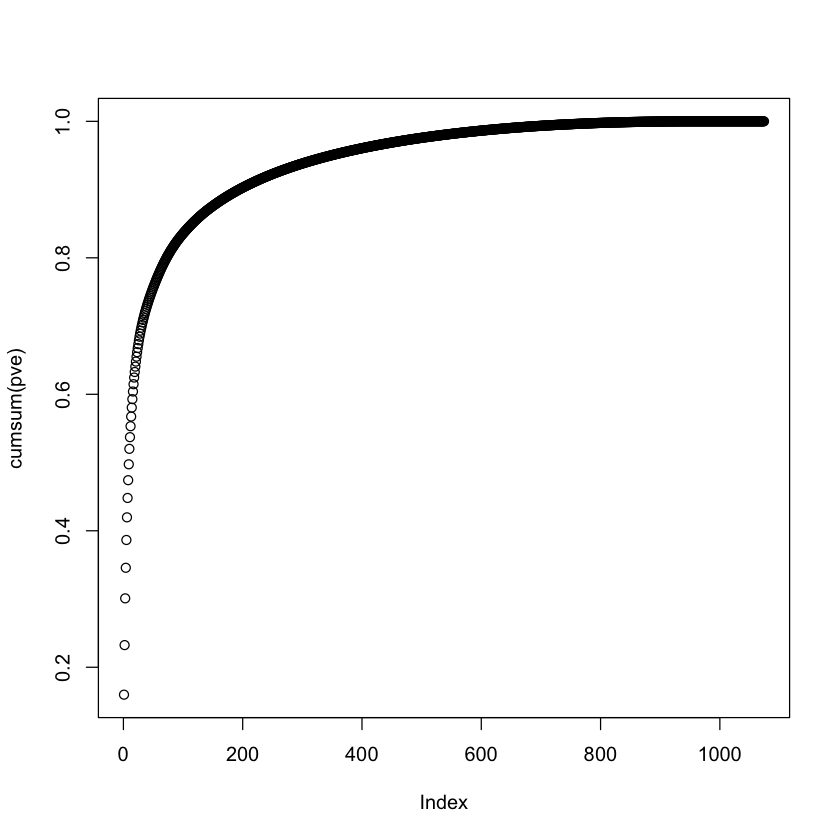

In [11]:
plot(cumsum(pve))

In [12]:
which.max(cumsum(pve)[cumsum(pve) < 0.93])

[1] 271

In [13]:
which.max(cumsum(pve)[cumsum(pve) < 0.99])

[1] 645

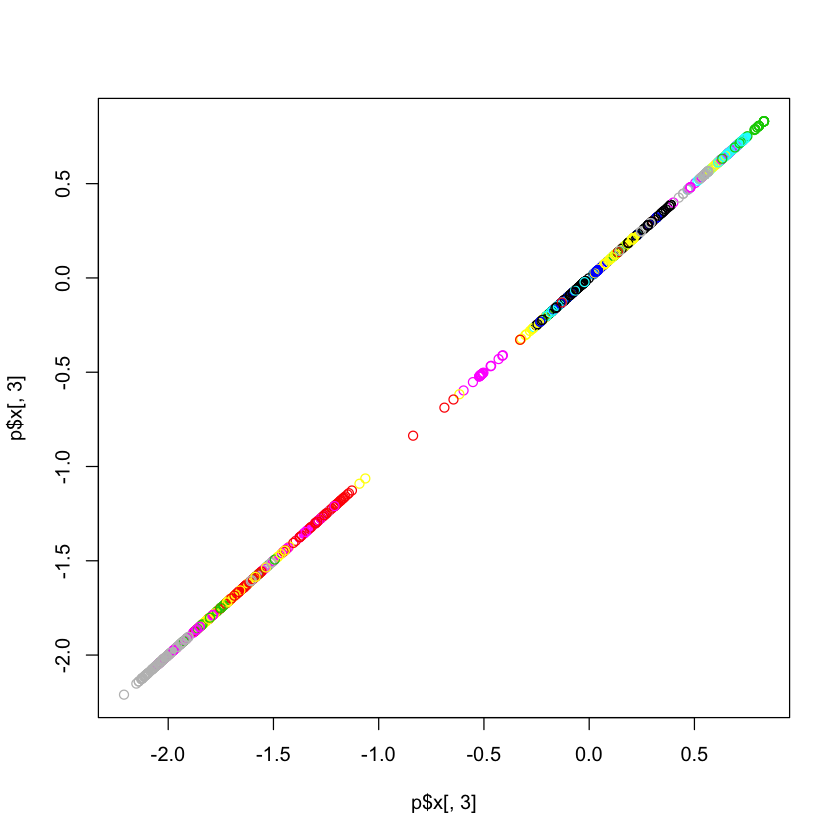

In [14]:
plot(p$x[, 3], p$x[, 3], col = data$Group)

# M-Fold cross validation

In [15]:
library(caret)
library(devtools)
library(factoextra)
library(class)

Loading required package: lattice
Loading required package: ggplot2


ERROR: Error in library(devtools): there is no package called ‘devtools’


In [14]:
kdata <- data[sample(nrow(data)),]

In [15]:
nfolds = 5
folds <- cut(seq(1, nrow(kdata)), breaks = nfolds, labels = FALSE)
for (i in 1:nfolds)
    {
    testIndexes <- which(folds == i, arr.ind = TRUE)
    testData <- kdata[testIndexes, ]
    trainData <- kdata[-testIndexes, ]
    knn.pred = knn(trainData[, -1], testData[, -1], trainData$Group, k = 1)
    print (mean(knn.pred == testData$Group))
}

[1] 0.9813953
[1] 0.9906977
[1] 0.9813084
[1] 0.9953488
[1] 0.972093


In [16]:
idx = sample(nrow(p$x))
kdata = p$x[idx, 1:100]
kgroup = data[idx, 1]
nfolds = 5
folds <- cut(seq(1, nrow(kdata)), breaks = nfolds, labels = FALSE)
res = rep(0, nfolds)
for (ks in 1:10)
    {
    for (i in 1:nfolds)
        {
        testIndexes <- which(folds == i, arr.ind = TRUE)
        testData <- kdata[testIndexes, ]
        trainData <- kdata[-testIndexes, ]
        trainGroup <- kgroup[-testIndexes]
        testGroup <- kgroup[testIndexes]
        knn.pred = knn(trainData, testData, trainGroup, k = ks)
        res[i] <- mean(knn.pred == testGroup)
    }
    print (mean(res))
}

[1] 0.9888329
[1] 0.984173
[1] 0.9851076
[1] 0.9841817
[1] 0.9851163
[1] 0.981391
[1] 0.9804521
[1] 0.977657
[1] 0.9692719
[1] 0.9692719


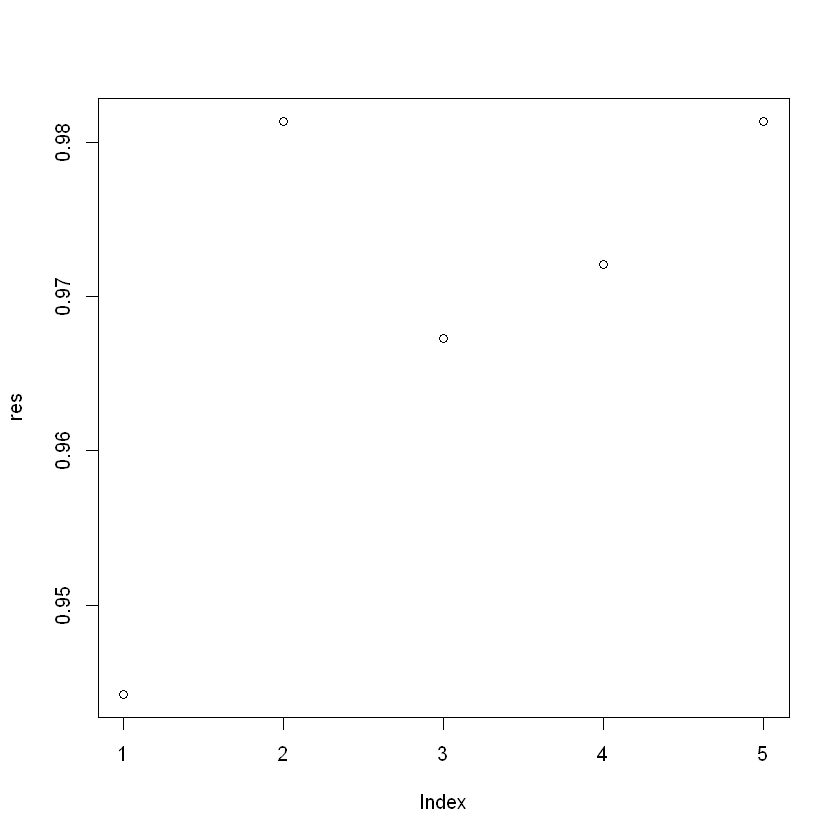

In [17]:
plot (res)

# Clustering Analysis

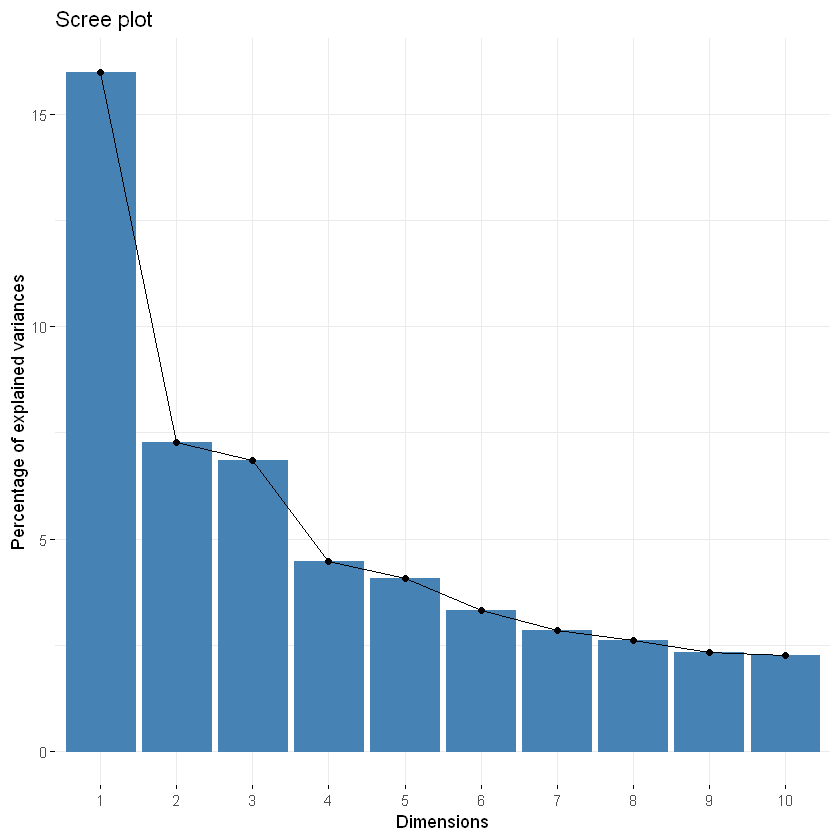

In [18]:
fviz_eig(p)

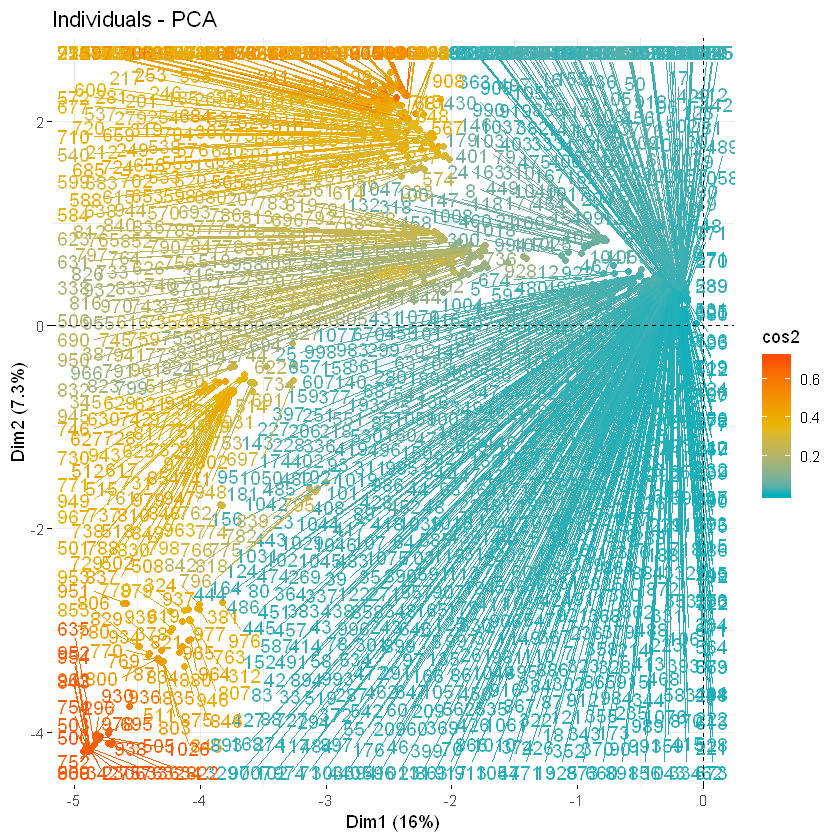

In [25]:
fviz_pca_ind(p,
             col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE    
             )

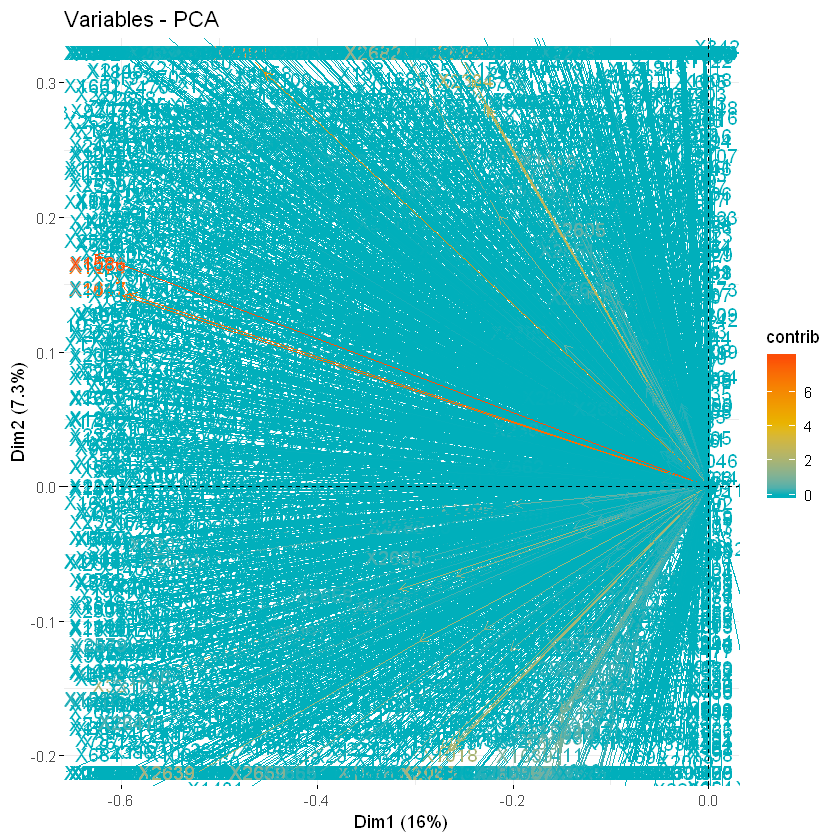

In [38]:
fviz_pca_var(p,
             col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE    
             )

In [19]:
eig.val <- get_eigenvalue(p)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.65677582,15.9825681,15.98257
Dim.2,1.66177734,7.2630839,23.24565
Dim.3,1.56752577,6.8511412,30.09679
Dim.4,1.02528909,4.4812024,34.57800
Dim.5,0.93190692,4.0730596,38.65106
Dim.6,0.75898696,3.3172831,41.96834
Dim.7,0.64999117,2.8408983,44.80924
Dim.8,0.59597346,2.6048046,47.41404
Dim.9,0.53226479,2.3263548,49.74040
Dim.10,0.51820393,2.2648995,52.00530


In [20]:

res.var <- get_pca_var(p)
res.var$coord         
res.var$contrib        
res.var$cos2            
# Results for individuals
res.ind <- get_pca_ind(p)
res.ind$coord          
res.ind$contrib        
res.ind$cos2           

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,...,Dim.1065,Dim.1066,Dim.1067,Dim.1068,Dim.1069,Dim.1070,Dim.1071,Dim.1072,Dim.1073,Dim.1074
X1,-3.303081e-04,2.630501e-05,-1.272098e-04,-1.805600e-05,-2.808202e-05,-2.299340e-05,1.500806e-04,5.452043e-05,-3.409624e-05,4.070874e-05,...,-2.612988e-18,6.915536e-18,5.948191e-18,-7.017832e-18,-1.036385e-17,1.121979e-17,-6.400700e-18,3.380076e-18,-2.843519e-19,-2.361960e-18
X2,-2.428163e-03,2.962165e-03,1.003437e-03,-1.321320e-03,5.533918e-04,-2.171268e-04,-2.425742e-04,-2.800180e-04,-7.203328e-04,-2.245899e-05,...,-5.506657e-19,-2.325504e-19,2.542836e-18,-1.168483e-18,-3.207471e-20,-5.468509e-19,-4.355020e-19,9.984114e-19,4.759810e-19,6.258625e-19
X3,-1.254757e-03,1.520288e-03,5.169301e-04,-5.874774e-04,2.371882e-04,9.472412e-05,1.143613e-04,5.396738e-05,-5.526712e-04,-1.030062e-04,...,3.243504e-18,1.446364e-18,3.313832e-18,-1.470362e-18,-9.106678e-18,-4.049162e-19,1.711793e-18,5.518908e-18,-9.440327e-19,-6.929991e-19
X4,-1.155357e-03,1.475825e-03,5.867605e-04,-3.778886e-04,5.434218e-04,3.381258e-04,1.260154e-06,-4.127564e-04,-1.169645e-03,-8.327975e-05,...,-1.064572e-17,1.195882e-17,4.585715e-18,-4.948742e-18,3.077678e-18,3.957076e-18,-1.715372e-18,2.069645e-18,-1.490477e-18,-1.753101e-18
X5,-1.155357e-03,1.475825e-03,5.867605e-04,-3.778886e-04,5.434218e-04,3.381258e-04,1.260154e-06,-4.127564e-04,-1.169645e-03,-8.327975e-05,...,-4.302898e-18,6.150996e-19,4.788992e-19,8.893063e-18,3.851182e-18,-3.780592e-18,6.919283e-19,-1.212808e-18,1.777271e-18,-6.029606e-19
X6,-1.155357e-03,1.475825e-03,5.867605e-04,-3.778886e-04,5.434218e-04,3.381258e-04,1.260154e-06,-4.127564e-04,-1.169645e-03,-8.327975e-05,...,1.352522e-17,-3.775256e-18,-1.125793e-17,-5.568966e-18,-1.456807e-17,-9.592633e-18,4.029313e-18,2.406281e-18,-1.094932e-18,4.624441e-19
X7,-2.342437e-04,2.411503e-04,-1.390699e-03,3.070916e-05,1.735472e-04,-7.156197e-04,1.393422e-03,-2.983666e-03,1.481640e-03,7.267645e-04,...,-1.474695e-18,-1.259426e-18,4.193372e-19,3.910999e-19,1.317423e-18,6.600750e-19,5.483019e-19,-1.059300e-18,7.940783e-19,-2.877331e-19
X8,-4.785113e-04,4.749345e-04,-2.783653e-03,4.331742e-05,3.437280e-04,-1.386648e-03,2.799909e-03,-5.957481e-03,2.977864e-03,1.452806e-03,...,6.272725e-19,1.251234e-18,-3.522873e-18,3.347714e-18,-1.820991e-18,-2.643644e-18,-4.140149e-18,1.651008e-18,-5.753135e-19,8.519807e-19
X9,-1.155357e-03,1.475825e-03,5.867605e-04,-3.778886e-04,5.434218e-04,3.381258e-04,1.260154e-06,-4.127564e-04,-1.169645e-03,-8.327975e-05,...,1.213872e-18,-1.434079e-18,-5.080145e-19,-2.876172e-18,-7.165229e-18,6.865318e-18,-7.437376e-18,-4.200584e-18,-5.343110e-19,3.607351e-19
X10,-8.036784e-05,2.975654e-04,-1.426110e-03,-3.308830e-05,3.202269e-05,3.459159e-04,-1.465732e-03,3.010653e-04,-1.637855e-05,2.599959e-04,...,-1.025938e-17,7.982502e-18,-6.607830e-18,-1.250892e-17,-3.729878e-18,-1.704807e-18,-3.500483e-18,1.846207e-19,3.583997e-19,1.131981e-18


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,...,Dim.1065,Dim.1066,Dim.1067,Dim.1068,Dim.1069,Dim.1070,Dim.1071,Dim.1072,Dim.1073,Dim.1074
X1,2.983597e-06,4.163937e-08,1.032350e-06,3.179779e-08,8.462214e-08,6.965818e-08,3.465308e-06,4.987601e-07,2.184164e-07,3.197971e-07,...,3.562672e-02,2.495473e-01,1.846167e-01,2.569846e-01,5.604586e-01,6.568568e-01,3.036168e-01,1.127970e-01,1.241111e-03,5.304165e-01
X2,1.612343e-04,5.280144e-04,6.423407e-05,1.702824e-04,3.286192e-05,6.211444e-06,9.052777e-06,1.315664e-05,9.748518e-05,9.733742e-08,...,1.582257e-03,2.821859e-04,3.373945e-02,7.124357e-03,5.368173e-06,1.560411e-03,1.405565e-03,9.841550e-03,3.477585e-03,3.724173e-02
X3,4.305475e-05,1.390846e-04,1.704704e-05,3.366170e-05,6.036896e-06,1.182189e-06,2.012105e-06,4.886925e-07,5.738600e-05,2.047511e-06,...,5.489464e-02,1.091581e-02,5.730099e-02,1.128106e-02,4.327341e-01,8.555225e-04,2.171567e-02,3.007120e-01,1.367957e-02,4.566015e-02
X4,3.650345e-05,1.310680e-04,2.196377e-05,1.392776e-05,3.168850e-05,1.506337e-05,2.443091e-10,2.858648e-05,2.570278e-04,1.338376e-06,...,5.913591e-01,7.462386e-01,1.097275e-01,1.277882e-01,4.942508e-02,8.170525e-02,2.180658e-02,4.228984e-02,3.409958e-02,2.922037e-01
X5,3.650345e-05,1.310680e-04,2.196377e-05,1.392776e-05,3.168850e-05,1.506337e-05,2.443091e-10,2.858648e-05,2.570278e-04,1.338376e-06,...,9.661027e-02,1.974204e-03,1.196711e-03,4.126710e-01,7.739079e-02,7.457971e-02,3.548077e-03,1.452207e-02,4.848481e-02,3.456606e-02
X6,3.650345e-05,1.310680e-04,2.196377e-05,1.392776e-05,3.168850e-05,1.506337e-05,2.443091e-10,2.858648e-05,2.570278e-04,1.338376e-06,...,9.545300e-01,7.436936e-02,6.613302e-01,1.618268e-01,1.107402e+00,4.801499e-01,1.203186e-01,5.716593e-02,1.840233e-02,2.033248e-02
X7,1.500505e-06,3.499474e-06,1.233820e-04,9.197918e-08,3.231936e-06,6.747303e-05,2.987157e-04,1.493734e-03,4.124370e-04,1.019264e-04,...,1.134763e-02,8.276497e-03,9.175462e-04,7.981352e-04,9.056314e-03,2.273462e-03,2.227975e-03,1.107854e-02,9.678880e-03,7.871395e-03
X8,6.261610e-06,1.357358e-05,4.943282e-04,1.830117e-07,1.267819e-05,2.533368e-04,1.206092e-03,5.955228e-03,1.666027e-03,4.073003e-04,...,2.053117e-03,8.169180e-03,6.475826e-02,5.847872e-02,1.730281e-02,3.646758e-02,1.270290e-01,2.691182e-02,5.080513e-03,6.901308e-02
X9,3.650345e-05,1.310680e-04,2.196377e-05,1.392776e-05,3.168850e-05,1.506337e-05,2.443091e-10,2.858648e-05,2.570278e-04,1.338376e-06,...,7.688595e-03,1.073117e-02,1.346646e-03,4.316491e-02,2.678930e-01,2.459362e-01,4.099305e-01,1.742063e-01,4.382144e-03,1.237225e-02
X10,1.766307e-07,5.328341e-06,1.297453e-04,1.067831e-07,1.100381e-07,1.576546e-05,3.305232e-04,1.520878e-05,5.039914e-08,1.304464e-05,...,5.492160e-01,3.324905e-01,2.278342e-01,8.164709e-01,7.259227e-02,1.516533e-02,9.080854e-02,3.365157e-04,1.971668e-03,1.218290e-01


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,...,Dim.1065,Dim.1066,Dim.1067,Dim.1068,Dim.1069,Dim.1070,Dim.1071,Dim.1072,Dim.1073,Dim.1074
X1,1.091035e-07,6.919537e-10,1.618235e-08,3.260192e-10,7.885996e-10,5.286965e-10,2.252420e-08,2.972478e-09,1.162554e-09,1.657201e-09,...,6.827704e-36,4.782464e-35,3.538097e-35,4.924997e-35,1.074094e-34,1.258837e-34,4.096896e-35,1.142491e-35,8.085599e-38,5.578855e-36
X2,5.895976e-06,8.774424e-06,1.006886e-06,1.745887e-06,3.062425e-07,4.714405e-08,5.884225e-08,7.841008e-08,5.188793e-07,5.044064e-10,...,3.032327e-37,5.407969e-38,6.466016e-36,1.365352e-36,1.028787e-39,2.990459e-37,1.896620e-37,9.968252e-37,2.265579e-37,3.917039e-37
X3,1.574416e-06,2.311277e-06,2.672168e-07,3.451297e-07,5.625825e-08,8.972658e-09,1.307851e-08,2.912478e-09,3.054455e-07,1.061028e-08,...,1.052032e-35,2.091968e-36,1.098148e-35,2.161965e-36,8.293159e-35,1.639571e-37,2.930235e-36,3.045834e-35,8.911978e-37,4.802478e-37
X4,1.334849e-06,2.178059e-06,3.442878e-07,1.427998e-07,2.953073e-07,1.143290e-07,1.587988e-12,1.703678e-07,1.368068e-06,6.935516e-09,...,1.133314e-34,1.430133e-34,2.102879e-35,2.449005e-35,9.472099e-36,1.565845e-35,2.942501e-36,4.283428e-36,2.221522e-36,3.073363e-36
X5,1.334849e-06,2.178059e-06,3.442878e-07,1.427998e-07,2.953073e-07,1.143290e-07,1.587988e-12,1.703678e-07,1.368068e-06,6.935516e-09,...,1.851493e-35,3.783475e-37,2.293444e-37,7.908658e-35,1.483160e-35,1.429287e-35,4.787648e-37,1.470903e-36,3.158692e-36,3.635615e-37
X6,1.334849e-06,2.178059e-06,3.442878e-07,1.427998e-07,2.953073e-07,1.143290e-07,1.587988e-12,1.703678e-07,1.368068e-06,6.935516e-09,...,1.829315e-34,1.425256e-35,1.267410e-34,3.101339e-35,2.122286e-34,9.201861e-35,1.623536e-35,5.790189e-36,1.198876e-36,2.138545e-37
X7,5.487012e-08,5.815346e-08,1.934044e-06,9.430524e-10,3.011863e-08,5.121115e-07,1.941625e-06,8.902261e-06,2.195257e-06,5.281866e-07,...,2.174724e-36,1.586154e-36,1.758437e-37,1.529591e-37,1.735603e-36,4.356990e-37,3.006350e-37,1.122117e-36,6.305603e-37,8.279036e-38
X8,2.289731e-07,2.255628e-07,7.748722e-06,1.876399e-09,1.181489e-07,1.922793e-06,7.839493e-06,3.549158e-05,8.867674e-06,2.110646e-06,...,3.934708e-37,1.565587e-36,1.241064e-35,1.120719e-35,3.316008e-36,6.988851e-36,1.714084e-35,2.725829e-36,3.309856e-37,7.258710e-37
X9,1.334849e-06,2.178059e-06,3.442878e-07,1.427998e-07,2.953073e-07,1.143290e-07,1.587988e-12,1.703678e-07,1.368068e-06,6.935516e-09,...,1.473485e-36,2.056582e-36,2.580787e-37,8.272364e-36,5.134051e-35,4.713259e-35,5.531456e-35,1.764491e-35,2.854882e-37,1.301298e-37
X10,6.458989e-09,8.854517e-08,2.033791e-06,1.094835e-09,1.025453e-09,1.196578e-07,2.148372e-06,9.064032e-08,2.682569e-10,6.759785e-08,...,1.052548e-34,6.372033e-35,4.366341e-35,1.564731e-34,1.391199e-35,2.906368e-36,1.225338e-35,3.408481e-38,1.284504e-37,1.281382e-36


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,...,Dim.1065,Dim.1066,Dim.1067,Dim.1068,Dim.1069,Dim.1070,Dim.1071,Dim.1072,Dim.1073,Dim.1074
4,-0.3245646,0.3493513,-2.01836731,0.073057826,-0.041756048,2.639265e-01,-1.274730065,0.239859898,-0.049795132,0.206515490,...,-6.071532e-18,-2.428613e-17,3.209238e-17,-1.929880e-17,7.155734e-17,1.127570e-17,1.863635e-15,3.642919e-17,2.862294e-17,-1.127570e-17
5,-0.7118442,0.5049027,-1.86873665,0.047725126,0.248553257,-7.605389e-01,1.082770629,-2.768746383,0.933597012,0.416793087,...,1.387779e-17,1.717376e-16,-1.127570e-16,1.387779e-17,-9.367507e-17,8.673617e-17,-4.864165e-15,9.020562e-16,7.320533e-16,-3.729655e-17
6,-0.2228955,0.5201551,-2.00244731,-0.044437969,0.044595075,3.282864e-01,-1.397085168,0.160869590,-0.052918456,0.261222864,...,1.652324e-16,1.127570e-16,-8.066464e-17,-1.279359e-16,2.471981e-17,6.548581e-17,-4.104085e-15,9.887924e-17,2.393918e-16,-2.038300e-16
7,-0.3445070,-0.1055355,-0.16316934,0.187069686,-0.272050758,-2.526271e-01,0.038635422,0.007831604,0.126570571,-0.241798308,...,-3.642919e-17,3.295975e-17,1.630640e-16,-7.199102e-17,-1.665335e-16,-3.590878e-16,-1.356120e-15,-1.396452e-16,2.827599e-16,-2.515349e-17
8,-0.8825785,0.8828284,-1.68882289,-0.311901680,0.287473914,-1.806757e-01,0.899068313,-1.547606968,0.465165360,0.441427640,...,-7.112366e-17,1.301043e-16,1.561251e-17,2.417771e-16,-1.843144e-16,-1.491862e-16,-2.317048e-15,3.816392e-16,4.466913e-16,1.092876e-16
9,-0.1589384,0.4074310,-1.91713498,-0.027451342,0.037689172,3.186021e-01,-1.265495153,0.250714602,-0.008882285,0.197463492,...,-9.020562e-17,-5.637851e-17,7.459311e-17,-2.534865e-16,1.565588e-16,-2.077331e-16,4.680501e-16,-2.445960e-16,-1.413800e-16,1.665335e-16
10,-0.8426354,0.8236929,-1.63412190,-0.075873538,0.212828076,-3.055492e-01,0.668599836,-1.710085837,0.441562874,0.370113233,...,-3.035766e-16,-5.898060e-17,3.417405e-16,-2.081668e-17,-1.415968e-16,-1.422473e-16,3.235259e-16,-3.235259e-16,-1.231654e-16,-1.353084e-16
11,-0.2249598,0.2926111,-1.71086245,-0.103499422,0.130693178,-1.544732e-01,1.484534849,1.308993583,-0.397757889,0.680462706,...,-2.602085e-17,3.035766e-17,1.023487e-16,-2.428613e-17,2.051311e-16,8.847090e-17,7.433290e-16,0.000000e+00,-2.116363e-16,1.864828e-16
12,-1.1016141,0.6332034,-1.59605541,-0.009808364,0.181292545,-4.411530e-01,0.813394504,-1.308152294,0.597060150,0.282394878,...,1.925543e-16,-1.838807e-16,-2.151057e-16,8.066464e-17,3.217912e-16,1.040834e-17,-4.033232e-17,-9.801188e-17,-1.379105e-16,-2.246467e-16
13,-0.3393436,-0.1141213,-0.11650812,0.167074825,-0.264788419,-2.574464e-01,-0.002434799,0.004260402,0.157511712,0.016529155,...,1.162265e-16,8.153200e-17,3.469447e-18,-1.483189e-16,-5.551115e-17,-3.521489e-16,-9.814198e-16,3.044440e-16,1.561251e-16,-2.402592e-16


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,...,Dim.1065,Dim.1066,Dim.1067,Dim.1068,Dim.1069,Dim.1070,Dim.1071,Dim.1072,Dim.1073,Dim.1074
4,0.0026822519,0.0068382900,0.241981094,4.847110e-04,1.742055e-04,8.545299e-03,2.327688e-01,8.988435e-03,4.337523e-04,7.663026e-03,...,0.0001790991,0.0028655861,5.003810e-03,0.0018094952,0.0248774180,6.177093e-04,2.396560e+01,0.01219942,0.01170908,0.011255243
5,0.0129023062,0.0142836177,0.207432706,2.068443e-04,6.172514e-03,7.095848e-02,1.679427e-01,1.197664e+00,1.524709e-01,3.121304e-02,...,0.0009357016,0.1432939275,6.177093e-02,0.0009357016,0.0426329040,3.655084e-02,1.632612e+02,7.48010017,7.65913287,0.123141683
6,0.0012650280,0.0151596279,0.238178866,1.793320e-04,1.986996e-04,1.322109e-02,2.795980e-01,4.043121e-03,4.898717e-04,1.226076e-02,...,0.1326439254,0.0617709258,3.161282e-02,0.0795209292,0.0029688423,2.083489e-02,1.162249e+02,0.08987739,0.81905464,3.677933714
7,0.0030219926,0.0006240509,0.001581460,3.178017e-03,7.394743e-03,7.829268e-03,2.138255e-04,9.582311e-06,2.802422e-03,1.050513e-02,...,0.0064475688,0.0052779418,1.291853e-01,0.0251798762,0.1347410301,6.264668e-01,1.269004e+01,0.17926375,1.14269390,0.056009819
8,0.0198337145,0.0436692250,0.169413978,8.834558e-03,8.256958e-03,4.004617e-03,1.157907e-01,3.741883e-01,3.785147e-02,3.501177e-02,...,0.0245767873,0.0822393982,1.184247e-03,0.2840057663,0.1650499034,1.081320e-01,3.704561e+01,1.33889367,2.85173502,1.057326857
9,0.0006432135,0.0093010288,0.218316426,6.843473e-05,1.419242e-04,1.245256e-02,2.294084e-01,9.820375e-03,1.380122e-05,7.005976e-03,...,0.0395333925,0.0154427314,2.703300e-02,0.3121809841,0.1190835624,2.096566e-01,1.511650e+00,0.54996994,0.28567348,2.455108166
10,0.0180790969,0.0380148756,0.158617072,5.227934e-04,4.525651e-03,1.145312e-02,6.403550e-02,4.568826e-01,3.410775e-02,2.461298e-02,...,0.4477478348,0.0169011101,5.674007e-01,0.0021053286,0.0974100543,9.830715e-02,7.222453e-01,0.96218459,0.21680605,1.620755000
11,0.0012885681,0.0047973842,0.173864622,9.728037e-04,1.706589e-03,2.927303e-03,3.156960e-01,2.676972e-01,2.767614e-02,8.319623e-02,...,0.0032895759,0.0044774783,5.089339e-02,0.0028655861,0.2044370925,3.802750e-02,3.812665e+00,0.00000000,0.64013911,3.078542072
12,0.0308998464,0.0224651536,0.151313250,8.736602e-06,3.283848e-03,2.387481e-02,9.477433e-02,2.673532e-01,6.235972e-02,1.432876e-02,...,0.1801371779,0.1642741117,2.248023e-01,0.0316128247,0.5030894672,5.263321e-04,1.122465e-02,0.08830751,0.27182473,4.467532304
13,0.0029320854,0.0007297207,0.000806294,2.534962e-03,7.005210e-03,8.130833e-03,8.492085e-07,2.835763e-06,4.340040e-03,4.909037e-05,...,0.0656306949,0.0322963255,5.848135e-05,0.1068783219,0.0149712256,6.024895e-01,6.646242e+00,0.85203016,0.34836918,5.110080144


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,...,Dim.1065,Dim.1066,Dim.1067,Dim.1068,Dim.1069,Dim.1070,Dim.1071,Dim.1072,Dim.1073,Dim.1074
4,0.010534215,0.0122046304,0.4073806600,5.337446e-04,1.743568e-04,6.965718e-03,1.624937e-01,5.753277e-03,2.479555e-04,4.264865e-03,...,3.686350e-36,5.898160e-35,1.029921e-34,3.724436e-35,5.120453e-34,1.271415e-35,3.473136e-31,1.327086e-34,8.192725e-35,1.271415e-35
5,0.019489317,0.0098048733,0.1343144866,8.760337e-05,2.376105e-03,2.224690e-02,4.509201e-02,2.948445e-01,3.352321e-02,6.681403e-03,...,7.407423e-36,1.134377e-33,4.890056e-34,7.407423e-36,3.375007e-34,2.893525e-34,9.100038e-31,3.129636e-32,2.061162e-32,5.350127e-35
6,0.006210303,0.0338201609,0.5012244040,2.468416e-04,2.485901e-04,1.347150e-02,2.439809e-01,3.234878e-03,3.500454e-04,8.529673e-03,...,3.412719e-33,1.589268e-33,8.133481e-34,2.045948e-33,7.638362e-35,5.360489e-34,2.105439e-30,1.222138e-33,7.163557e-33,5.193334e-33
7,0.008477503,0.0007955529,0.0019017309,2.499648e-03,5.286544e-03,4.558602e-03,1.066211e-04,4.381002e-06,1.144294e-03,4.176173e-03,...,9.479186e-35,7.759606e-35,1.899276e-33,3.701934e-34,1.980957e-33,9.210287e-33,1.313615e-31,1.392914e-33,5.710941e-33,4.519272e-35
8,0.040997094,0.0410203156,0.1501117236,5.120140e-03,4.349540e-03,1.718090e-03,4.254336e-02,1.260572e-01,1.138836e-02,1.025570e-02,...,2.662408e-34,8.909010e-34,1.282897e-35,3.076640e-33,1.787989e-33,1.171396e-33,2.825639e-31,7.665708e-33,1.050174e-32,6.286197e-34
9,0.002806825,0.0184444451,0.4083785055,8.373069e-05,1.578304e-04,1.127859e-02,1.779420e-01,6.984201e-03,8.766110e-06,4.332426e-03,...,9.041171e-34,3.531707e-34,6.182369e-34,7.139488e-33,2.723406e-33,4.794784e-33,2.434121e-32,6.647468e-33,2.220922e-33,3.081488e-33
10,0.035501717,0.0339235030,0.1335177189,2.878397e-04,2.264789e-03,4.668016e-03,2.235129e-02,1.462197e-01,9.748889e-03,6.849190e-03,...,4.607938e-33,1.739355e-34,5.839329e-33,2.166671e-35,1.002483e-33,1.011715e-33,5.233451e-33,5.233451e-33,7.584854e-34,9.154186e-34
11,0.003373795,0.0057080840,0.1951366892,7.141420e-04,1.138714e-03,1.590798e-03,1.469229e-01,1.142309e-01,1.054742e-02,3.086863e-02,...,4.513898e-35,6.143917e-35,6.983502e-34,3.932107e-35,2.805250e-33,5.218066e-34,3.683587e-32,0.000000e+00,2.985994e-33,2.318388e-33
12,0.055161524,0.0182248443,0.1157905857,4.372910e-06,1.493954e-03,8.846180e-03,3.007321e-02,7.778466e-02,1.620367e-02,3.624858e-03,...,1.685325e-33,1.536914e-33,2.103203e-33,2.957629e-34,4.706799e-33,4.924253e-36,7.394073e-35,4.366513e-34,8.645141e-34,2.293915e-33
13,0.010468550,0.0011839711,0.0012340129,2.537636e-03,6.373901e-03,6.025332e-03,5.389313e-07,1.650093e-06,2.255449e-03,2.483754e-05,...,1.228054e-33,6.043152e-34,1.094278e-36,1.999862e-33,2.801353e-34,1.127353e-32,8.756226e-32,8.426012e-33,2.215914e-33,5.247680e-33


# Using NbClust

Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"Warning message:
"did not converge in 10 iterations"

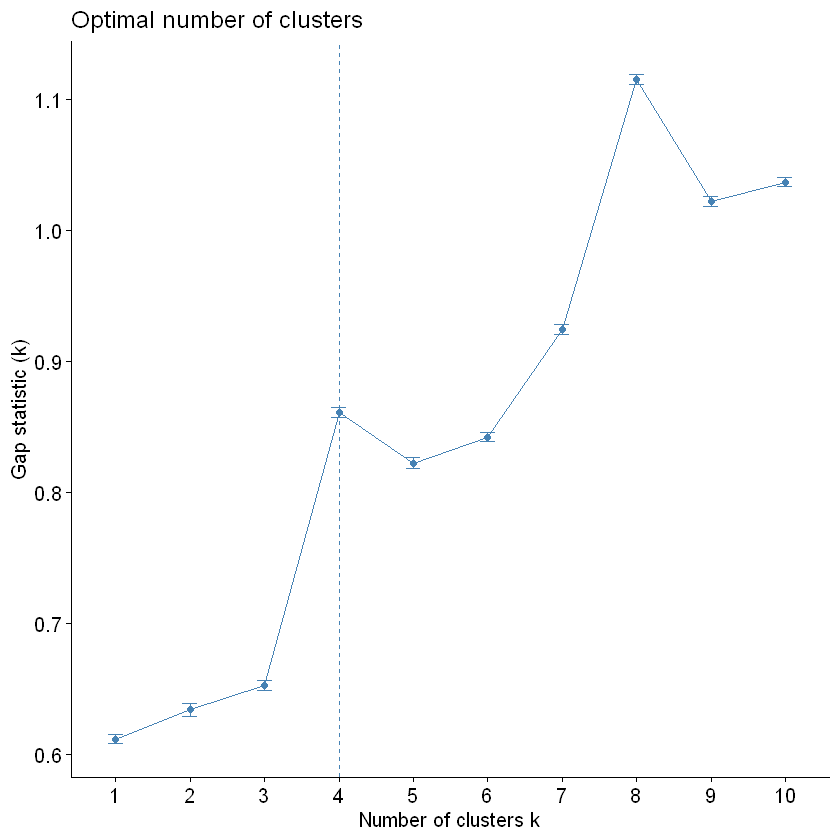

In [21]:
pcs = 13
fviz_nbclust(p$x[,1:pcs], kmeans, method = "gap_stat")

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


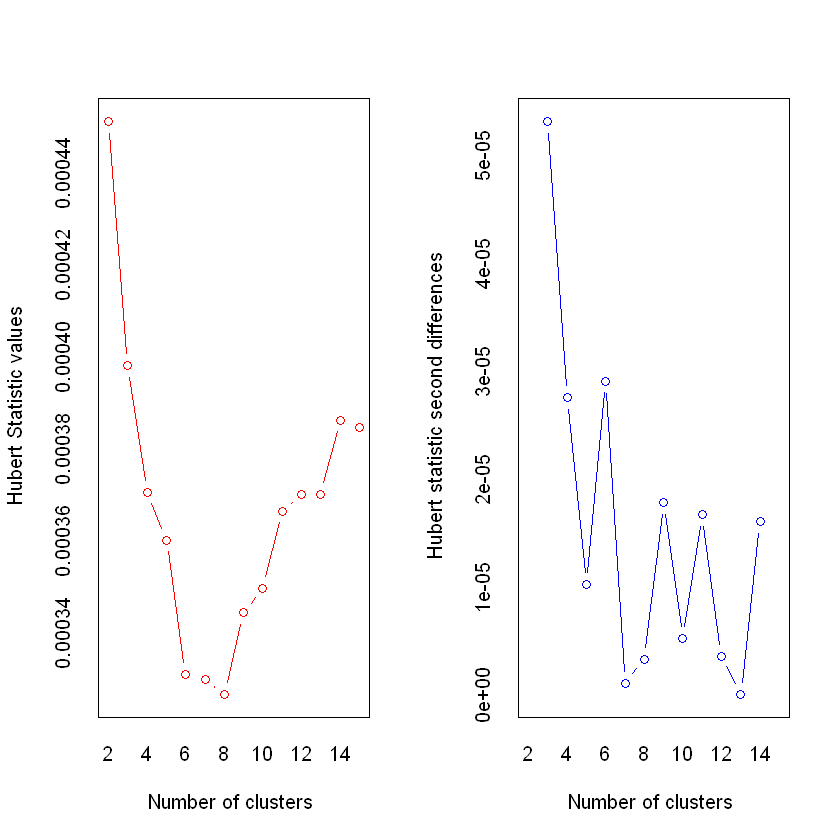

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 1 proposed 2 as the best number of clusters 
* 3 proposed 3 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 6 proposed 6 as the best number of clusters 
* 1 proposed 9 as the best number of clusters 
* 1 proposed 11 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 6 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  6 
 
 
**************************

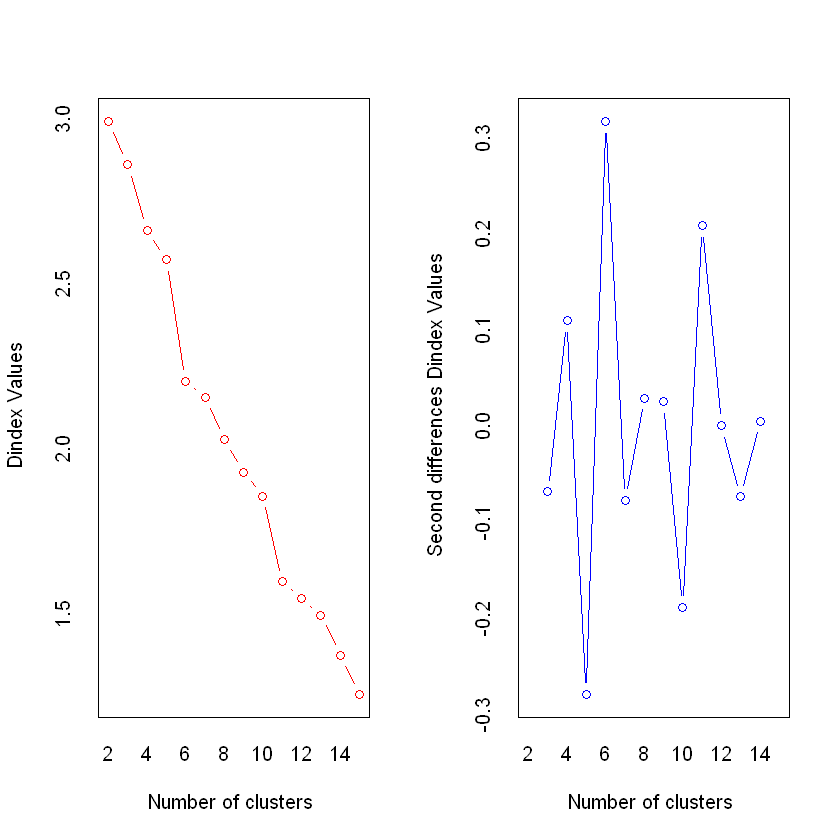

In [22]:
library(NbClust)
nb <- NbClust(p$x[,1:pcs], distance='euclidean', method='complete')

So according to NbClust, the best number of clusters is 6.

# Using K-Means

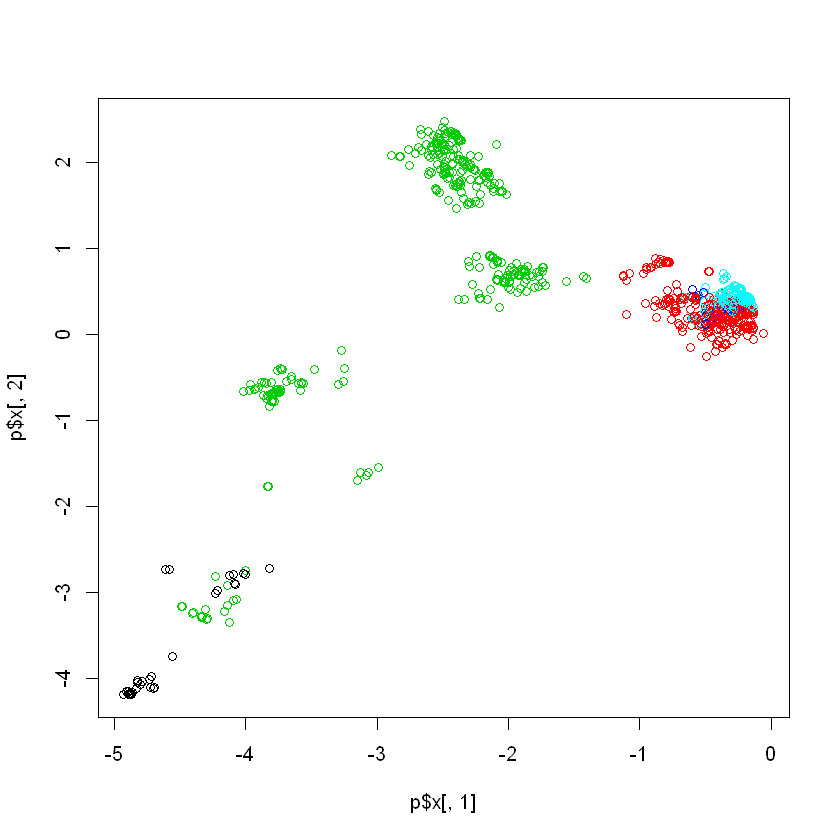

In [23]:
pcs = 11
clusters = 6
km <- kmeans(p$x[, 1:pcs], clusters)
plot(p$x[, 1], p$x[, 2], col = km$cluster)

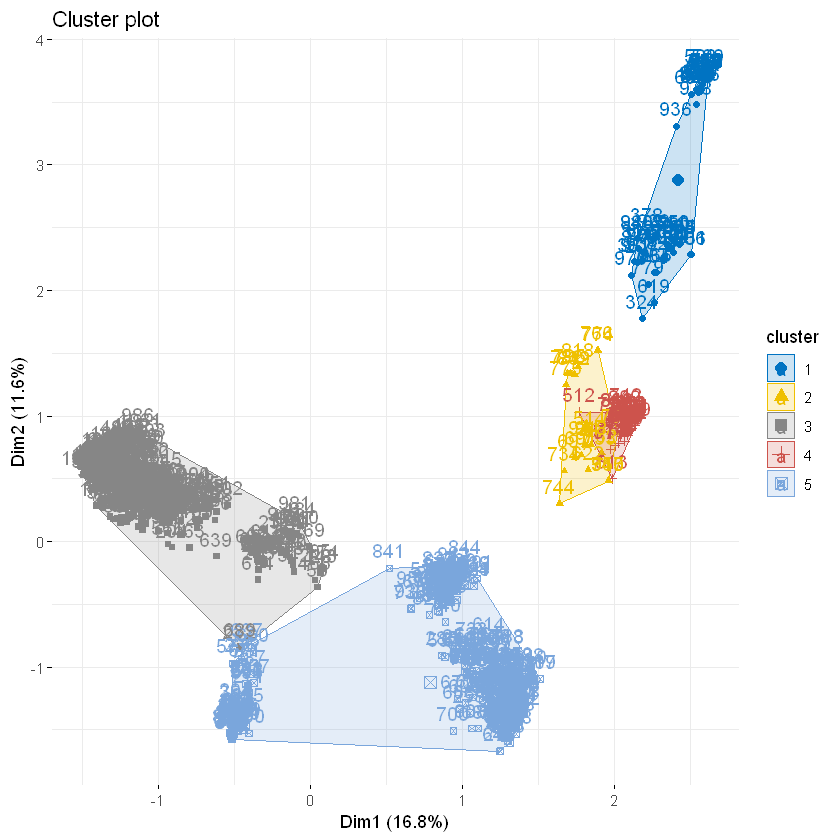

In [24]:
km.res = eclust(p$x[, 1:pcs], "kmeans", k = clusters, graph = F)
fviz_cluster(km.res, ggtheme = theme_minimal(), palette = 'jco')

  cluster size ave.sil.width
1       1   62          0.23
2       2   24          0.23
3       3  552          0.39
4       4   48          0.82
5       5  388          0.31


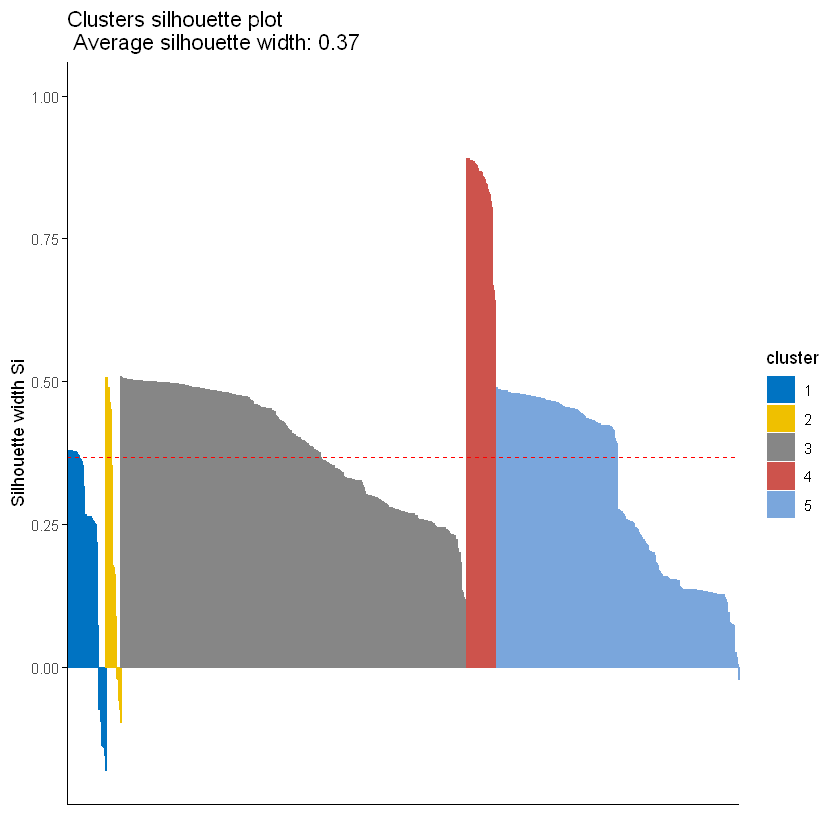

In [25]:
fviz_silhouette(km.res, palette = 'jco', ggtheme = theme_classic())

In [26]:
pcs = 13
samplepx = p$x[, 1:pcs]
idx = sample(nrow(samplepx))
kdata = samplepx[idx, ]
kgroup = km$cluster[idx]
nfolds = 5
folds <- sample(rep(1:nfolds, length.out = nrow(kdata)))
res = rep(0, nfolds)
for (i in 1:nfolds)
    {
    testIndexes <- which(folds == i, arr.ind = TRUE)
    testData <- kdata[testIndexes, ]
    trainData <- kdata[-testIndexes, ]
    trainGroup <- kgroup[-testIndexes]
    testGroup <- kgroup[testIndexes]
    knn.pred = knn(trainData, testData, trainGroup, k = 1)
    res[i] <- mean(knn.pred == testGroup)
}
print (mean(res))

[1] 1



# Using Gaussian mixture

In [27]:
citation("mclust")
library(mclust)
pcs = 10
mc <-Mclust(p$x[, 1:pcs])
summary(mc)


To cite 'mclust' R package in publications, please use::

  Scrucca L., Fop M., Murphy T. B. and Raftery A. E. (2017) mclust 5:
  clustering, classification and density estimation using Gaussian
  finite mixture models The R Journal 8/1, pp. 205-233

A BibTeX entry for LaTeX users is

  @Article{,
    title = {{mclust} 5: clustering, classification and density estimation using {G}aussian finite mixture models},
    author = {Luca Scrucca and Michael Fop and Thomas Brendan Murphy and Adrian E. Raftery},
    journal = {The {R} Journal},
    year = {2017},
    volume = {8},
    number = {1},
    pages = {205--233},
    url = {https://journal.r-project.org/archive/2017/RJ-2017-008/RJ-2017-008.pdf},
  }


Package 'mclust' version 5.4.1
Type 'citation("mclust")' for citing this R package in publications.


---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVV (ellipsoidal, equal volume) model with 9 components: 

 log.likelihood    n  df      BIC      ICL
       5929.687 1074 585 7776.575 7776.033

Clustering table:
  1   2   3   4   5   6   7   8   9 
203 100 136 224 114  42 113  63  79 

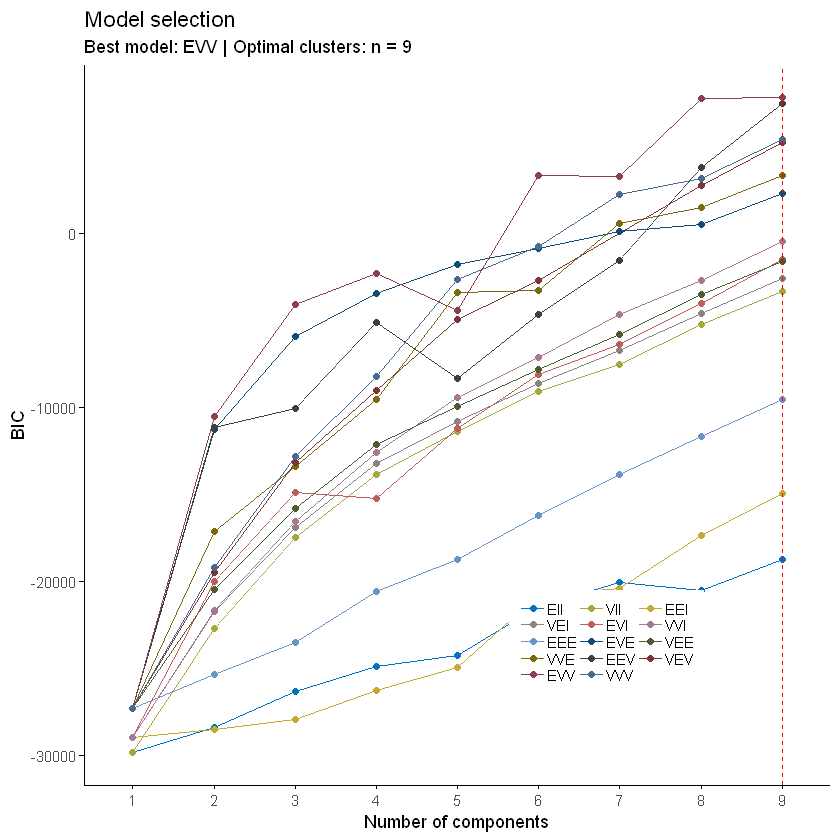

In [28]:
fviz_mclust(mc, "BIC", palette = "jco")

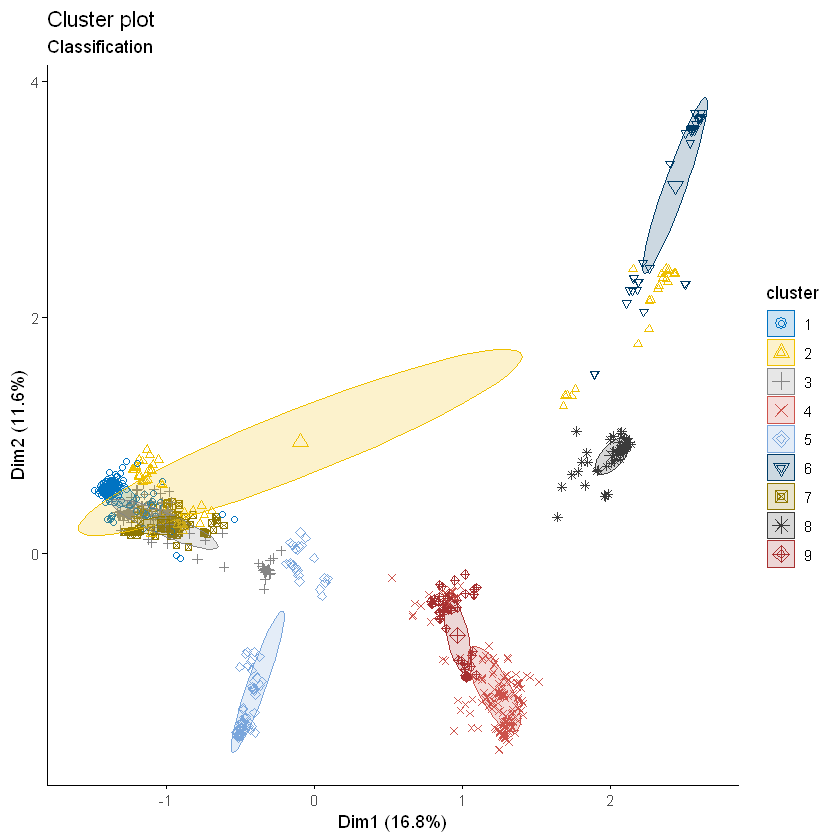

In [29]:
fviz_mclust(mc, "classification", geom = "point", palette = "jco")

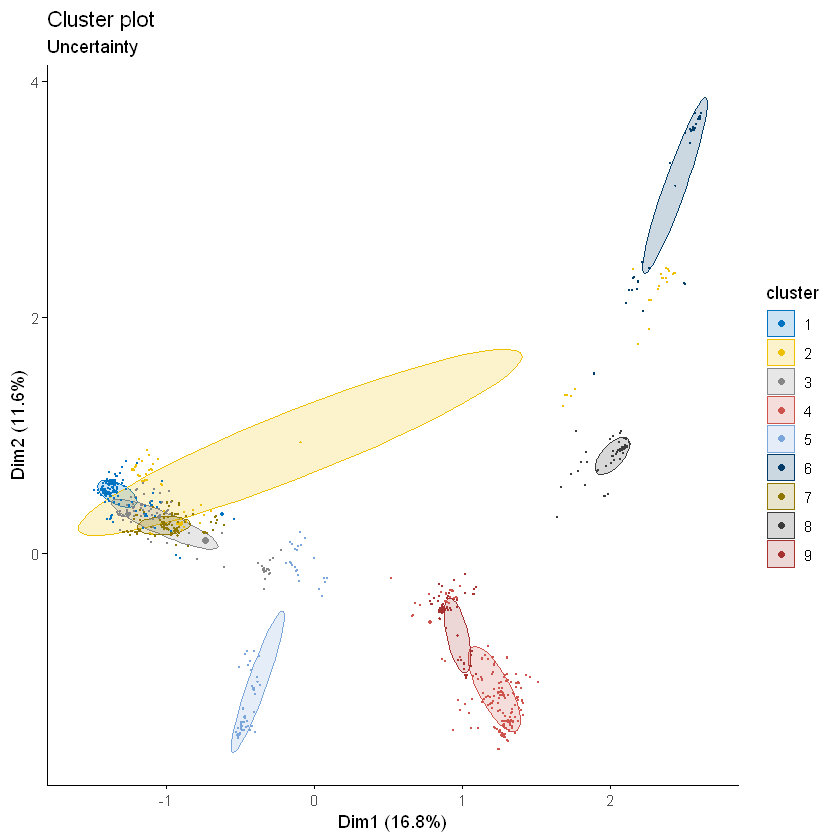

In [30]:
fviz_mclust(mc, "uncertainty", palette = "jco")

In [31]:
pcs = 13
samplepx = p$x[, 1:pcs]
idx = sample(nrow(samplepx))
kdata = samplepx[idx, ]
kgroup = mc$classification[idx]
nfolds = 5
folds <- sample(rep(1:nfolds, length.out = nrow(kdata)))
res = rep(0, nfolds)
for (i in 1:nfolds)
    {
    testIndexes <- which(folds == i, arr.ind = TRUE)
    testData <- kdata[testIndexes, ]
    trainData <- kdata[-testIndexes, ]
    trainGroup <- kgroup[-testIndexes]
    testGroup <- kgroup[testIndexes]
    knn.pred = knn(trainData, testData, trainGroup, k = 1)
    res[i] <- mean(knn.pred == testGroup)
}
print (mean(res))

[1] 0.9888372


# Hierarchical clustering

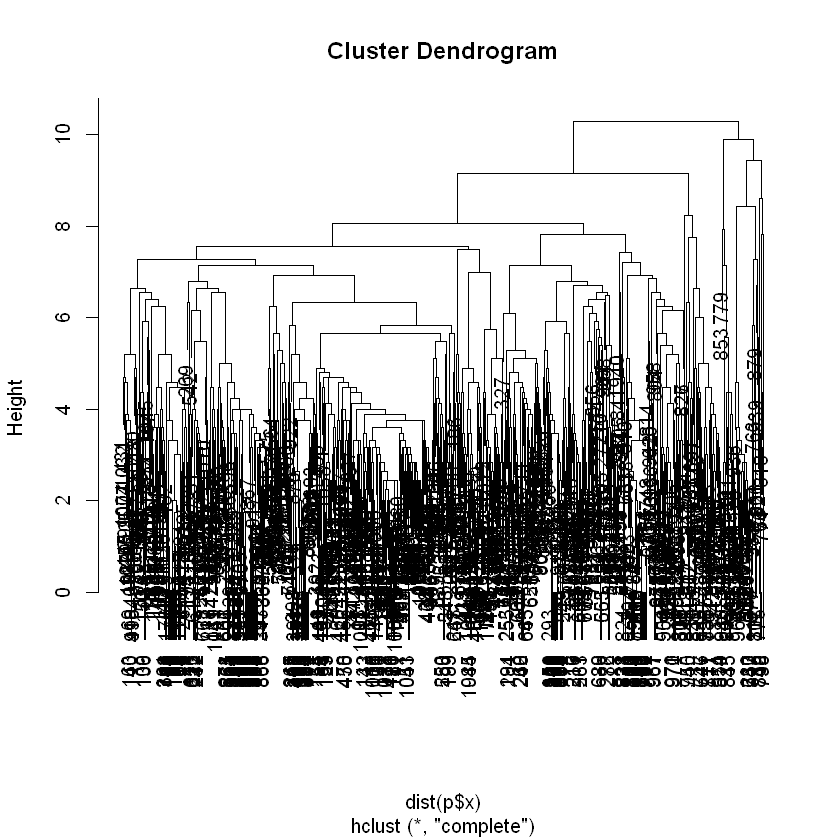

In [32]:
clusters <- hclust(dist(p$x), method = "complete")
plot(clusters)

# Density based scan

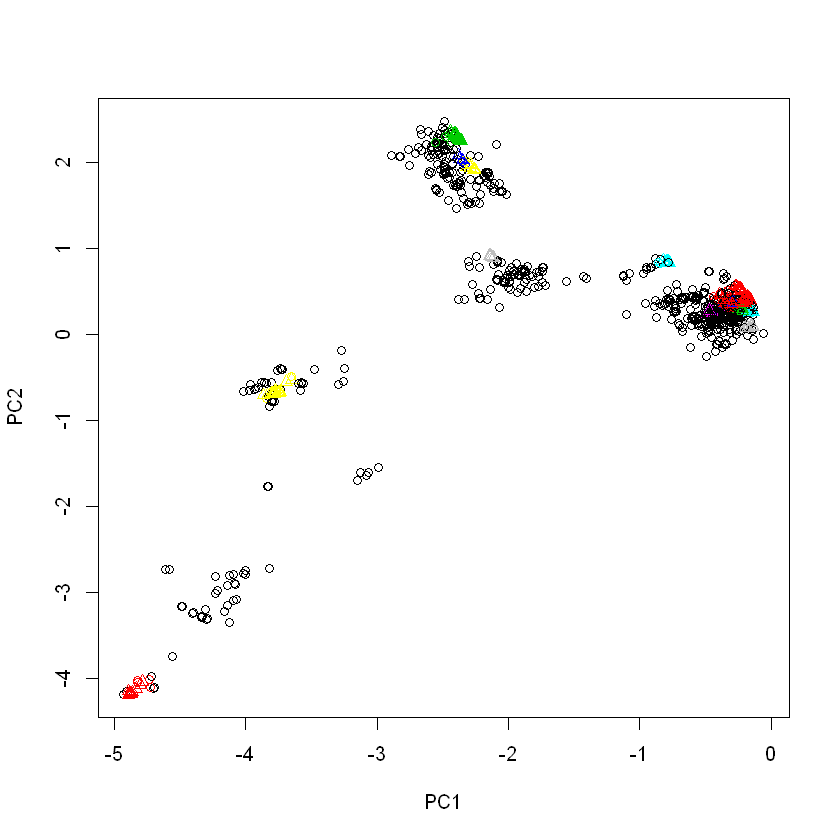

In [33]:
pcs = 13
db <- fpc::dbscan(p$x[, 1:pcs], eps = 0.2, MinPts = 10)
plot(db, data = p$x[, 1:pcs])

In [34]:
pcs = 13
samplepx = p$x[, 1:pcs]
idx = sample(nrow(samplepx))
kdata = samplepx[idx, ]
kgroup = db$cluster[idx]
nfolds = 5
folds <- sample(rep(1:nfolds, length.out = nrow(kdata)))
res = rep(0, nfolds)
for (i in 1:nfolds)
    {
    testIndexes <- which(folds == i, arr.ind = TRUE)
    testData <- kdata[testIndexes, ]
    trainData <- kdata[-testIndexes, ]
    trainGroup <- kgroup[-testIndexes]
    testGroup <- kgroup[testIndexes]
    knn.pred = knn(trainData, testData, trainGroup, k = 1)
    res[i] <- mean(knn.pred == testGroup)
}
print (mean(res))

[1] 0.9459943


# Conclusion

We have used K-Means, Hierarchical, Gaussian mixture and DB Scan clustering methods on the given dataset and knn method to access the accuracy of the model on the dataset wgere the given mitochondria dataset is studied using clustering methods. First we have used Principle component analysis and found that 347 and 545 principle components accounts for 95% and 98% variance respectively.